In [17]:
ls

dashboard.pdf                    INCIDENTS.csv     reassigned.csv
group_status_hr_correlation.png  Quesitons.gdoc    reassignment.csv
INCIDENT_HISTORY.csv             RA_DATA/          service_hr_correlation.png
INCIDENT_OWNER_HISTORY.csv       reassign_all.csv


In [18]:
cd drive/MyDrive/CANDEV2022

[Errno 2] No such file or directory: 'drive/MyDrive/CANDEV2022'
/content/drive/MyDrive/CANDEV2022


In [19]:
import pandas as pd
incidents = pd.read_csv('INCIDENTS.csv')
incidents_history = pd.read_csv('INCIDENT_HISTORY.csv')
incidents_owner_history = pd.read_csv('INCIDENT_OWNER_HISTORY.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
# delete all datapoints without ticket number
incidents = incidents[~incidents['TICKET_NMBR'].isnull()]
incidents_history = incidents_history[~incidents_history['ticket_nmbr'].isnull()]
incidents_owner_history = incidents_owner_history[~incidents_owner_history['ticket_nmbr'].isnull()]

In [21]:
# Closed status is not important, delete it
incidents_owner_history = incidents_owner_history[incidents_owner_history.STATUS != 'CLOSED']

In [22]:
incidents_owner_history['assigned_group']=incidents_owner_history['assigned_group'].astype('str')
incidents = incidents.rename({'TICKET_NMBR': 'ticket_nmbr', 'ASSIGNED_GROUP': 'assigned_group'}, axis='columns')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
# delete the datapoints without being assigned
incidents_owner_history= incidents_owner_history[incidents_owner_history.assigned_group != 'nan']

In [24]:
# group the owner dataset by ticketnumber, assignedgroup and status
import numpy as np
f = {'assigned_group': lambda x: np.unique(x).tolist(),
     'STATUS':lambda x: np.unique(x).tolist(),
     }
group = incidents_owner_history.groupby('ticket_nmbr', as_index=False).agg(f).reindex(columns=incidents_owner_history.columns)
reassigned = group[['ticket_nmbr', 'assigned_group', 'STATUS']]
# tickets being reassigned to more than two groups
# reassigned = group.loc[group.assigned_group.str.len() > 1].reset_index(drop=True)

In [25]:
reassigned['reassignment_num'] = reassigned.assigned_group.str.len()-1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
reassigned.head()

,ticket_nmbr,assigned_group,STATUS,reassignment_num
0,IN10028612,[DC000152],"[QUEUED, RESOLVED]",0
1,IN10028613,[NDS00032],"[QUEUED, RESOLVED]",0
2,IN10028614,[DC000155],"[INPROG, QUEUED, RESOLVED]",0
3,IN10028615,[DC000133],"[INPROG, QUEUED, RESOLVED]",0
4,IN10028617,[DC000115],"[QUEUED, RESOLVED]",0


In [27]:
# find the attributes of the tickets being reassigned
data = pd.merge(reassigned, incidents, on=['ticket_nmbr'])

In [28]:
data.to_csv('reassign_all.csv')

In [29]:
data.head()

,ticket_nmbr,assigned_group_x,STATUS_x,reassignment_num,PARENT_SERVICE,service,org_id,assigned_group_y,OPEN_DATE,CLOSE_DATE,PRIORITY,STATUS_y,ACTUAL_COMPLETION_HRS,BUSINESS_COMPLETION_HRS,AGING,CLASS_STRUCTURE_ID,class_structure,CLASSIFICATION_ID,classification,EXTERNAL_SYSTEM,GLOBAL_TICKET_ID,CLOSURE_CODE,LAST_MODIFIED_DATE
0,IN10028612,[DC000152],"[QUEUED, RESOLVED]",0,Middleware,Middleware,1342.0,DC000152,01APR2016:00:01:16,01APR2016:08:26:30,Low,CLOSED,8.42,1.43,NaN,2101,IT Issue \ Hardware,2101,Hardware Issue,EVENTMANAGEMENT,NaN,OTH,12APR2016:05:30:11
1,IN10028613,[NDS00032],"[QUEUED, RESOLVED]",0,Midrange,Midrange - Windows -X86,1342.0,NDS00032,01APR2016:00:35:21,11APR2016:11:06:12,Low,CLOSED,250.51,64.10,NaN,21,IT Issue,21,IT Issue,EVENTMANAGEMENT,NaN,CIS,22APR2016:05:30:33
2,IN10028614,[DC000155],"[INPROG, QUEUED, RESOLVED]",0,Mainframe,Mainframe,1065.0,DC000155,01APR2016:01:43:26,01APR2016:10:28:51,Low,CLOSED,8.76,3.47,NaN,3102,IT Request \ Software Request,3102,Software Request,CREATEDFROMSR,NaN,SUP,12APR2016:05:30:09
3,IN10028615,[DC000133],"[INPROG, QUEUED, RESOLVED]",0,High-performance Computing,High-performance Computing,1342.0,DC000133,01APR2016:02:57:00,01APR2016:07:42:08,Low,CLOSED,4.75,0.70,NaN,3102,IT Request \ Software Request,3102,Software Request,EVENTMANAGEMENT,NaN,OSD,12APR2016:05:30:10
4,IN10028617,[DC000115],"[QUEUED, RESOLVED]",0,Midrange,Midrange - Windows -X86,1342.0,DC000115,01APR2016:06:21:10,18APR2016:13:09:13,Medium,CLOSED,414.80,116.15,NaN,2101,IT Issue \ Hardware,2101,Hardware Issue,EVENTMANAGEMENT,NaN,BSR,29APR2016:05:30:36


In [31]:
group_status_hr = incidents[['assigned_group', 'STATUS', 'ACTUAL_COMPLETION_HRS', 'BUSINESS_COMPLETION_HRS']]
group_status_hr.head()

,assigned_group,STATUS,ACTUAL_COMPLETION_HRS,BUSINESS_COMPLETION_HRS
0,DC000152,CLOSED,8.42,1.43
1,NDS00032,CLOSED,250.51,64.10
2,DC000155,CLOSED,8.76,3.47
3,DC000133,CLOSED,4.75,0.70
4,NaN,CLOSED,0.04,0.00


In [ ]:
# library to calculate the correlation between categorical and numerical data
!pip install dython

In [33]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

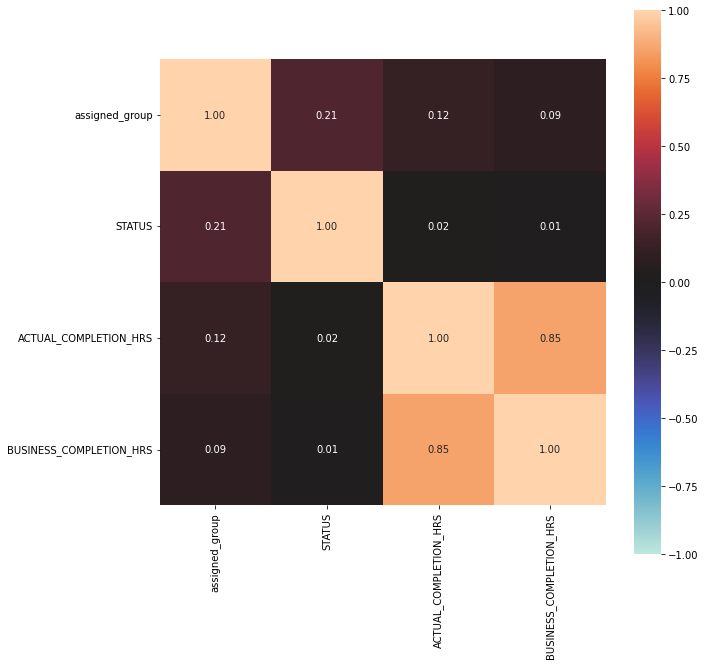

In [34]:
group_status_hr_cor= associations(group_status_hr, filename= 'group_status_hr_correlation.png', figsize=(10,10))

In [35]:
service_hr = incidents[['PARENT_SERVICE', 'service', 'ACTUAL_COMPLETION_HRS', 'BUSINESS_COMPLETION_HRS']]
service_hr.head()

,PARENT_SERVICE,service,ACTUAL_COMPLETION_HRS,BUSINESS_COMPLETION_HRS
0,Middleware,Middleware,8.42,1.43
1,Midrange,Midrange - Windows -X86,250.51,64.10
2,Mainframe,Mainframe,8.76,3.47
3,High-performance Computing,High-performance Computing,4.75,0.70
4,NaN,-1,0.04,0.00


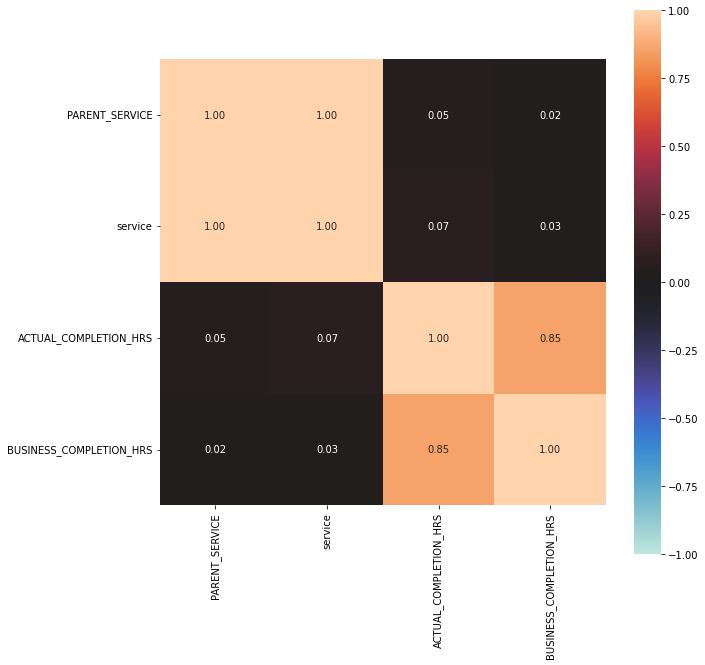

In [36]:
service_hr_cor= associations(service_hr, filename= 'service_hr_correlation.png', figsize=(10,10))